In [4358]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_excel('data/data_io.xlsx', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'M0', 'yield'])
data.drop(columns = ['NO', 'NO2', 'NOx/m_xy'], inplace = True)
#data['NOx'] = 1 / data['NOx']
scaler = StandardScaler()

In [4359]:
X = scaler.fit_transform(data[data.columns[:-2]])
y1 = data[data.columns[-2]].to_numpy()
y2 = data[data.columns[-1]].to_numpy()
X.shape

(37, 3)

In [4360]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
# yields
X = sm.add_constant(X)
model = OLS(y1, X).fit()
model.params

array([ 39.67042649,  -2.87565065,  66.07366037, -25.07263559])

In [4361]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.61e-20
Time:                        14:45:19   Log-Likelihood:                -141.45
No. Observations:                  37   AIC:                             290.9
Df Residuals:                      33   BIC:                             297.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6704      1.927     20.589      0.000      35.750      43.590
x1            -2.8757      2.002     -1.436      0.160      -6.948       1.197
x2            66.0737      4.171     15.842      0.000      57.588      74.559
x3           -25.0726      4.172     -6.010      0.000     -33.561     -16.584
==============================================================================
Omnibus:                        4.098   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                2.766
Skew:                           0.601   Prob(JB):                        0.251
Kurtosis:                       3.592   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4362]:
# M0
model = OLS(y2, X).fit()
model.params

array([ 0.08958691, -0.00683546,  0.05508334, -0.04542872])

In [4363]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     7.710
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           0.000488
Time:                        14:45:19   Log-Likelihood:                 76.004
No. Observations:                  37   AIC:                            -144.0
Df Residuals:                      33   BIC:                            -137.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0896      0.005     16.590      0.000       0.079       0.101
x1            -0.0068      0.006     -1.218      0.232      -0.018       0.005
x2             0.0551      0.012      4.712      0.000       0.031       0.079
x3            -0.0454      0.012     -3.885      0.000      -0.069      -0.022
==============================================================================
Omnibus:                       16.700   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.928
Skew:                           1.400   Prob(JB):                     4.71e-05
Kurtosis:                       5.255   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4364]:
def percent_error(actual, pred):
    return np.mean(np.absolute((actual - pred) / pred) * 100)

In [4365]:
# Set up the k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the MSE for each fold
mse_scores = []
percent_errs = []

# Iterate over the folds
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y1[train_index], y1[val_index]

    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Create an instance of the Ridge model
    model = Ridge(alpha=0.1)  # You can adjust the value of alpha for regularization

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_val, y_pred)
    percent_err = percent_error(y_val, y_pred)
    mse_scores.append(mse)
    percent_errs.append(percent_err)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_scores)
avg_percent_err = np.mean(percent_errs)




In [4366]:
# 1 / NOx, more consistent, less error
avg_mse, avg_percent_err

(183.60544192766469, 4661.663106827722)

In [4367]:
# Set up the k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the MSE for each fold
mae_scores = []
percent_errs = []

# Iterate over the folds
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y2[train_index], y2[val_index]

    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Create an instance of the Ridge model
    model = Ridge(alpha=0.1)  # You can adjust the value of alpha for regularization

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_val, y_pred)
    percent_err = percent_error(y_val, y_pred)
    mae_scores.append(mae)
    percent_errs.append(percent_err)

# Calculate the average MSE across all folds
avg_mae = np.mean(mae_scores)
avg_percent_err = np.mean(percent_errs)

In [4368]:
avg_mae, avg_percent_err

(0.02318407445934668, 28.025106046618184)

In [4369]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 10)
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 25.75180457,  31.24296513,  77.42741123,  15.00929744,
        14.54747319,   3.96243641,  60.44597767, 151.77129626])

In [4370]:
y_test

array([ 32.62112,  63.     ,  75.222  ,  11.55588,  11.60712,  12.19596,
        88.84008, 183.96   ])

In [4371]:
percent_error(y_test, y_pred)

56.29524198727415

In [4372]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2, random_state = 20)
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0.0720846 , 0.08516251, 0.07940176, 0.07760962, 0.04842421,
       0.08423164, 0.08264891, 0.09833232])

In [4373]:
y_test

array([0.06581399, 0.09846962, 0.06643457, 0.08507576, 0.04266969,
       0.05002047, 0.06016967, 0.19284756])

In [4374]:
percent_error(y_test, y_pred)

28.261440350526506

# PCA

In [4375]:
data = pd.read_excel('data/data_io.xlsx', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'M0', 'yield'])
#data = pd.read_excel('data/data_temp.xlsx', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'wall loss factor', 'M0', 'yield'])
X = data[data.columns[:-2]]
y = data[data.columns[-2:]]
y1 = data[data.columns[-2]]
y2 = data[data.columns[-1]]

In [4376]:
n_components = 3
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_scaled)

ratio = pca.explained_variance_ratio_
f'Percent of Variance Captured by {n_components} Principal Components: {ratio.sum():.2%}'

'Percent of Variance Captured by 3 Principal Components: 96.15%'

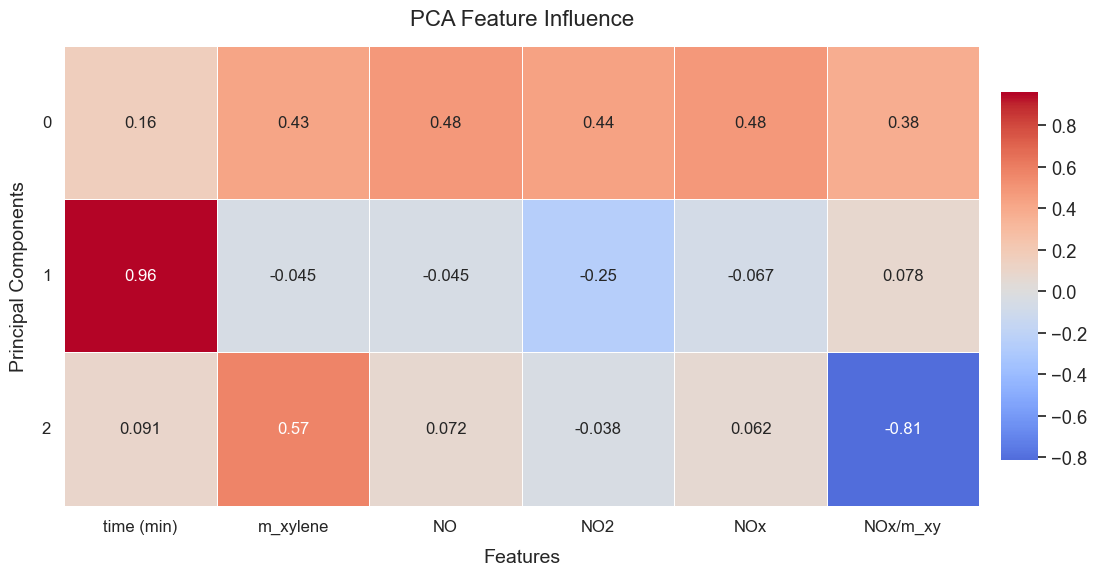

In [4377]:
loadings = pca.components_
loadings = np.round(pd.DataFrame(loadings, columns = X.columns), 3)
plt.figure(figsize = (12, 6))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
ax = sns.heatmap(loadings, annot = True, cmap = 'coolwarm', center = 0, linewidths = 0.5,
            cbar_kws = {'shrink': 0.8, 'aspect': 10, 'pad': 0.02},
            annot_kws = {'fontsize': 12})

ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('PCA Feature Influence', fontsize = 16, pad = 15)
ax.set_xlabel('Features', fontsize = 14, labelpad = 10)
ax.set_ylabel('Principal Components', fontsize = 14, labelpad = 10)

ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

In [4378]:
pca.explained_variance_ratio_

array([0.70727934, 0.15887953, 0.09533627])

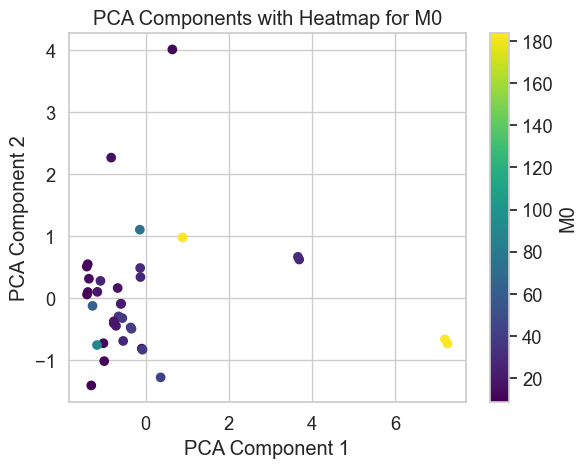

In [4379]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y1, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('M0')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('PCA Components with Heatmap for M0')

plt.show()

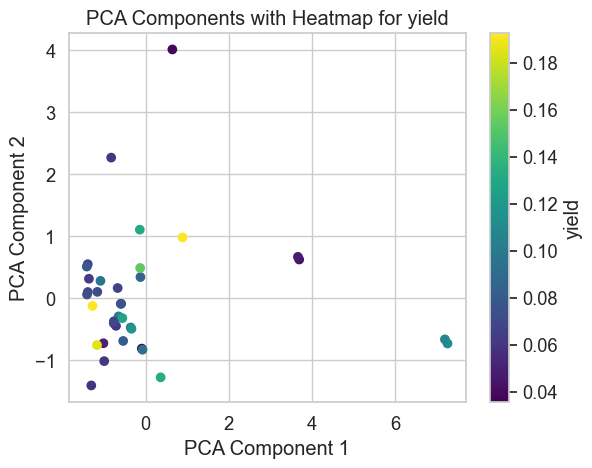

In [4380]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y2, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('yield')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('PCA Components with Heatmap for yield')

plt.show()

In [4381]:
model = OLS(y1, X_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     M0   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              10.30
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                    5.72e-05
Time:                        14:45:20   Log-Likelihood:                         -192.54
No. Observations:                  37   AIC:                                      391.1
Df Residuals:                      34   BIC:                                      395.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.7569      3.666      4.298      0.000       8.307      23.207
x2            -4.1019      7.734     -0.530      0.599     -19.820      11.616
x3            34.7728      9.985      3.483      0.001      14.482      55.064
==============================================================================
Omnibus:                       15.179   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.212
Skew:                           1.302   Prob(JB):                     0.000183
Kurtosis:                       5.093   Cond. No.                         2.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4382]:
model = OLS(y2, X_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  yield   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.051
Method:                 Least Squares   F-statistic:                             0.3981
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                       0.755
Time:                        14:45:20   Log-Likelihood:                          33.969
No. Observations:                  37   AIC:                                     -61.94
Df Residuals:                      34   BIC:                                     -57.10
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009      0.008      0.113      0.911      -0.015       0.017
x2            -0.0058      0.017     -0.341      0.735      -0.040       0.029
x3             0.0226      0.022      1.032      0.309      -0.022       0.067
==============================================================================
Omnibus:                       10.215   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.502
Skew:                           1.190   Prob(JB):                      0.00864
Kurtosis:                       3.709   Cond. No.                         2.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4383]:
x = pd.DataFrame(X_pca)
x.corr()

,0,1,2
0,1.000000e+00,7.049034e-17,1.271091e-16
1,7.049034e-17,1.000000e+00,5.841200e-18
2,1.271091e-16,5.841200e-18,1.000000e+00


# T-SNE

In [4384]:
tsne = TSNE(n_components = 2, random_state = 10)

X_tsne = tsne.fit_transform(X)

model = OLS(y1, X_tsne).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     M0   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              24.77
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                    1.99e-07
Time:                        14:45:20   Log-Likelihood:                         -188.19
No. Observations:                  37   AIC:                                      380.4
Df Residuals:                      35   BIC:                                      383.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            33.3442     10.543      3.163      0.003      11.942      54.747
x2            12.0777      1.876      6.437      0.000       8.269      15.887
==============================================================================
Omnibus:                       13.245   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.525
Skew:                           1.248   Prob(JB):                      0.00116
Kurtosis:                       4.595   Cond. No.                         9.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4385]:
# suggests non-linear relationship not captured by linear models
model = OLS(y2, X_tsne).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  yield   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              87.59
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                    2.37e-14
Time:                        14:45:20   Log-Likelihood:                          66.494
No. Observations:                  37   AIC:                                     -129.0
Df Residuals:                      35   BIC:                                     -125.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0030      0.011     -0.274      0.786      -0.025       0.019
x2             0.0158      0.002      8.196      0.000       0.012       0.020
==============================================================================
Omnibus:                       11.526   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.985
Skew:                           1.231   Prob(JB):                      0.00412
Kurtosis:                       4.030   Cond. No.                         9.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

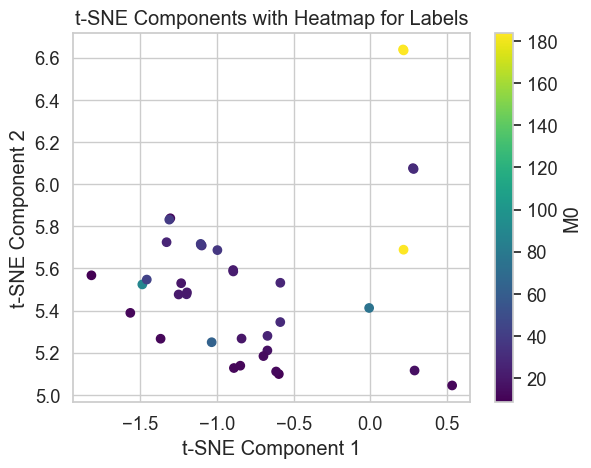

In [4386]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y1, cmap='viridis')

# Add a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('M0')

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Components with Heatmap for Labels')

plt.show()


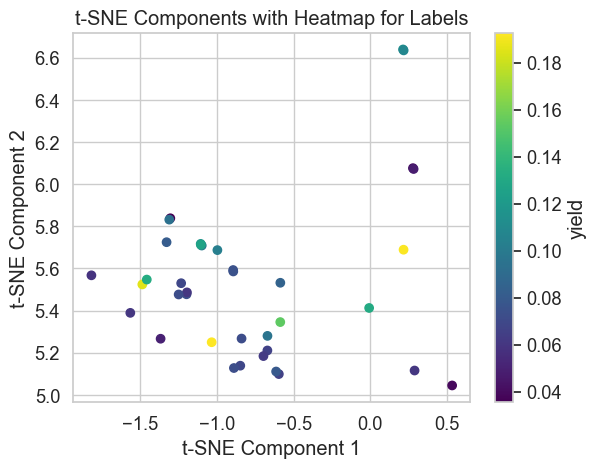

In [4387]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y2, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('yield')

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Components with Heatmap for Labels')

plt.show()

In [4388]:
outlier_indices = np.where(X_tsne[:, 0] > -0.25)
outliers = X.loc[outlier_indices]

In [4389]:
outliers

,time (min),m_xylene,NO,NO2,NOx,NOx/m_xy
2,729,167.0,49.28,2.33,51.61,0.309042
3,728,291.0,89.64,2.77,92.41,0.317560
8,658,401.0,434.12,44.03,478.15,1.192394
9,664,404.2,432.00,42.92,474.92,1.174963
10,719,154.5,223.24,24.23,247.47,1.601748
11,724,155.5,222.59,23.81,246.40,1.584566
22,1095,71.2,69.02,0.94,69.96,0.982584
23,870,78.1,20.73,0.00,20.73,0.265429


In [4390]:
outliers.mean()

time (min)    773.375000
m_xylene      215.312500
NO            192.577500
NO2            17.628750
NOx           210.206250
NOx/m_xy        0.928536
dtype: float64

In [4391]:
with pd.ExcelWriter('written_data/temp.xlsx') as file:
    outliers.mean().to_excel(file)

In [4392]:
mask = ~X.index.isin(list(outlier_indices[0]))
non_outliers = X.loc[mask]
non_outliers

,time (min),m_xylene,NO,NO2,NOx,NOx/m_xy
0,603,78.4000,21.30,0.98,22.28,0.284184
1,603,81.3000,64.40,1.15,65.55,0.806273
4,636,39.0000,8.76,1.05,9.81,0.251538
5,631,40.9000,8.62,0.91,9.53,0.233007
6,584,55.7000,6.82,2.86,9.68,0.173788
7,578,55.7000,6.92,2.63,9.55,0.171454
12,492,55.2000,7.03,10.56,17.59,0.318659
13,610,59.5000,15.30,10.23,25.53,0.429076
14,444,51.2000,13.67,8.63,22.30,0.435547
15,368,47.0000,21.00,1.56,22.56,0.480000


In [4393]:
non_outliers.mean()

time (min)    532.172414
m_xylene       72.566559
NO             31.351724
NO2             4.052759
NOx            35.404483
NOx/m_xy        0.480873
dtype: float64

In [4394]:
with pd.ExcelWriter('written_data/temp.xlsx') as file:
    non_outliers.mean().to_excel(file)

In [4395]:
outlier_indices = np.where(X_pca[:, 0] > 0.4)
X.loc[outlier_indices[0]]

,time (min),m_xylene,NO,NO2,NOx,NOx/m_xy
3,728,291.0,89.64,2.77,92.41,0.317560
8,658,401.0,434.12,44.03,478.15,1.192394
9,664,404.2,432.00,42.92,474.92,1.174963
10,719,154.5,223.24,24.23,247.47,1.601748
11,724,155.5,222.59,23.81,246.40,1.584566
22,1095,71.2,69.02,0.94,69.96,0.982584


In [4396]:
X.loc[outlier_indices[0]].mean()

time (min)    764.666667
m_xylene      246.233333
NO            245.101667
NO2            23.116667
NOx           268.218333
NOx/m_xy        1.142302
dtype: float64